# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 

## Homework 5: Autoencoders 

**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors:** Pavlos Protopapas, Mark Glickman, Chris Tanner<br/>

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

In [3]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot
import matplotlib.pylab as plt 
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam, SGD


<div class="theme"> Overview </div> 


In this homework, we will investigate autoencoders, how they are related to PCA (and in doing so, show that they can be a more powerful extension of this technique), and one possible application of autoencoders for outlier detection.

<div class='exercise'><b> Question 1: Autoencoders and MNIST [50pts total] </b></div>

For this question, we will be using the [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits, a simple standardized image dataset. The dataset consists of single-channel (black and white) 28x28 images, containing one digit each. We will see if it is feasible to encode (compress, in this case) the images into just 2 dimensions, a substantial compression ratio considering that the original vector has dimension 28x28=784.

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.

**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.

**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes. 

**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.

**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.

**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.

**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.

**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'. 

**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?



## Answers

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.


In [4]:
# your code here
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.


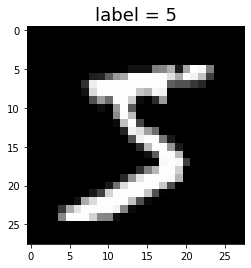

In [5]:
# your code here
fig, ax = plt.subplots()

ax.imshow(x_train[0], cmap='gray')
ax.set_title(f'label = {y_train[0]}', fontsize=18)
    
plt.show()

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.


In [6]:
# your code here
x_train_pca = x_train.reshape(len(x_train), -1)
pca_transformer = PCA(n_components=2)
pca_transformer.fit(x_train_pca)
pca_latent_train = pca_transformer.transform(x_train_pca)

**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes.


In [7]:
# your code here
import pandas as pd
df_pca_latent_train = pd.DataFrame(pca_latent_train, columns=['PCA vector 1', 'PCA vector 2'])
df_pca_latent_train['labels'] = y_train

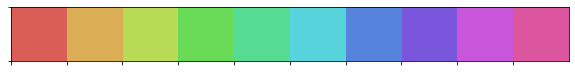

In [8]:
current_palette = sns.color_palette('hls', 10)
sns.palplot(current_palette)

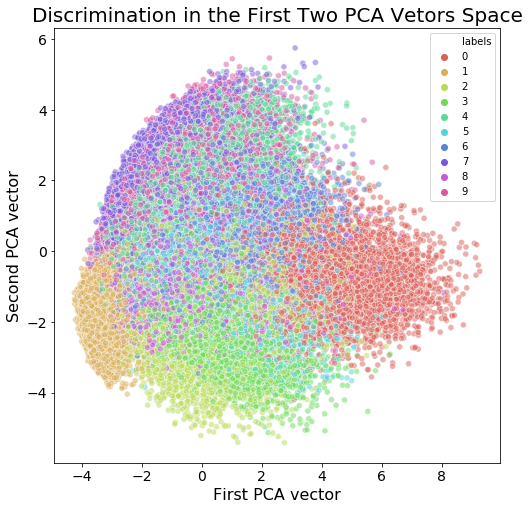

In [9]:
fig, ax = plt.subplots(figsize=(8,8))

current_palette = sns.color_palette("hls", 10)

sns.scatterplot(x='PCA vector 1',
                y='PCA vector 2',
                hue='labels',
                palette=current_palette,
                alpha=0.5,
                data=df_pca_latent_train, ax=ax)

ax.set_title('First Two PCA Vetors Space', fontsize=20)
ax.set_xlabel('First PCA vector', fontsize=16)
ax.set_ylabel('Second PCA vector', fontsize=16)
ax.tick_params(labelsize=14)

**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.


In [10]:
# your code here
input_shape = (28, 28)
encoding_dim_linear = 2

input_encoder_linear = Input(shape=input_shape, name='Input_encoder')
flatten_layer_linear = Flatten(name='Flatten')(input_encoder_linear)
latent_view_linear = Dense(encoding_dim_linear, use_bias=False, activation='linear', name='latent_view')(flatten_layer_linear)

linear_encoder = Model(input_encoder_linear, latent_view_linear, name='linear_encoder')

encoded_input_linear = Input(shape=(encoding_dim_linear,), name='Encoded_input')
output_layer_linear = Dense(784, use_bias=False, activation='linear', name='Output_dense')(encoded_input_linear)
output_image_linear = Reshape(target_shape=input_shape, name='Output_image')(output_layer_linear)

linear_decoder = Model(encoded_input_linear, output_image_linear, name='linear_decoder')

lae =Sequential(name='lae')
lae.add(linear_encoder)
lae.add(linear_decoder)
lae.compile(loss='mse', optimizer=Adam(lr=0.0001))

In [11]:
display(linear_encoder.summary())
display(linear_decoder.summary())
display(lae.summary())

Model: "linear_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_encoder (InputLayer)   [(None, 28, 28)]          0         
_________________________________________________________________
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
latent_view (Dense)          (None, 2)                 1568      
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________


None

Model: "linear_decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encoded_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
Output_dense (Dense)         (None, 784)               1568      
_________________________________________________________________
Output_image (Reshape)       (None, 28, 28)            0         
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________


None

Model: "lae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
linear_encoder (Model)       (None, 2)                 1568      
_________________________________________________________________
linear_decoder (Model)       (None, 28, 28)            1568      
Total params: 3,136
Trainable params: 3,136
Non-trainable params: 0
_________________________________________________________________


None

**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.


In [12]:
# your code here
from datetime import datetime

In [13]:
x_train_center = x_train - np.mean(x_train)
x_test_center = x_test - np.mean(x_test)
np.mean(x_train), np.mean(x_test), np.mean(x_train_center), np.mean(x_test_center)

(0.13066062, 0.13251467, -1.5422235e-07, -6.5086816e-08)

In [14]:
# your code here
batch_size = 256
epochs = 50

StartTime = datetime.now()

callbacks = [ tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss',
                    patience=10,
                    verbose=5, mode='auto')
            ]

history_lae = lae.fit(x_train_center, x_train_center, epochs=epochs, batch_size=batch_size,
                      validation_data=(x_test_center, x_test_center), callbacks=callbacks)

print(datetime.now() - StartTime)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0918 - val_loss: 0.0844
Epoch 2/50
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0745 - val_loss: 0.0684
Epoch 3/50
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0660 - val_loss: 0.0648
Epoch 4/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0642 - val_loss: 0.0638
Epoch 5/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0632 - val_loss: 0.0626
Epoch 6/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0620 - val_loss: 0.0612
Epoch 7/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0609 - val_loss: 0.0603
Epoch 8/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0602 - val_loss: 0.0598
Epoch 9/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0598 - val_

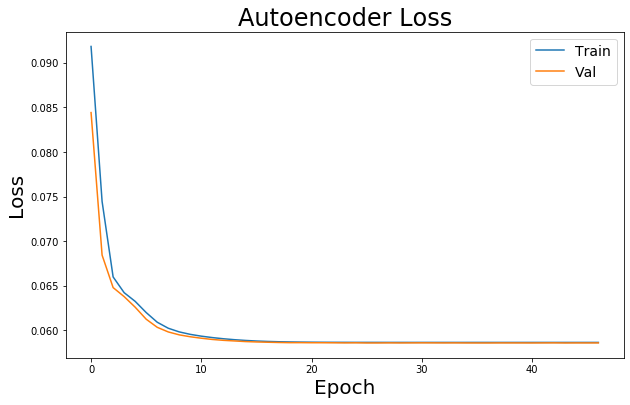

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(history_lae.history['loss'], label='Train')
ax.plot(history_lae.history['val_loss'], label='Val')
ax.set_xlabel("Epoch", fontsize=20)
ax.set_ylabel("Loss", fontsize=20)
ax.legend(fontsize=14)
ax.set_title('Autoencoder Loss', fontsize=24)

plt.show()

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.


In [17]:
# your code here
lae_latent_train = linear_encoder.predict(x_train_center)

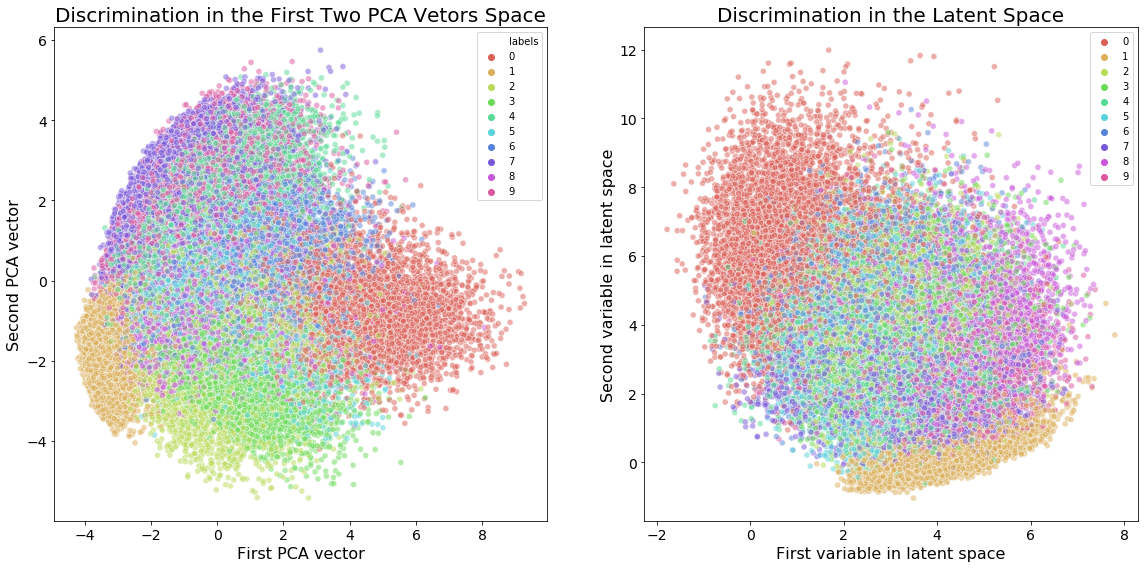

In [18]:
# your code here
fig, ax = plt.subplots(1, 2, figsize=(16,8))

current_palette = sns.color_palette("hls", 10)

sns.scatterplot(x='PCA vector 1',
                y='PCA vector 2',
                hue='labels',
                palette=current_palette,
                alpha=0.5,
                data=df_pca_latent_train, ax=ax[0])

sns.scatterplot(x=lae_latent_train[:,0],
                y=lae_latent_train[:,1],
                hue=y_train,
                palette=current_palette,
                alpha=0.5, ax=ax[1])

ax[0].set_title('Discrimination in the First Two PCA Vetors Space', fontsize=20)
ax[0].set_xlabel('First PCA vector', fontsize=16)
ax[0].set_ylabel('Second PCA vector', fontsize=16)
ax[0].tick_params(labelsize=14)

ax[1].set_title('Discrimination in the Latent Space', fontsize=20)
ax[1].set_xlabel('First variable in latent space', fontsize=16)
ax[1].set_ylabel('Second variable in latent space', fontsize=16)
ax[1].tick_params(labelsize=14)

plt.tight_layout()

**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*


*Your answer here*<br>
The discrimination abilities in the 2D space using the first 2 PCA vectors and the 2D linear autoencoder latent space are similar to each other. Both plots separate zeros and ones from the other digits very well. On the other hand, twos and threes seem to be separated better in the PCA 2D space than the latent space. As PCA mathematically selects the first two components with the largest variances, the plot should be the best representation of the whole data in the 2D space. We expect that the LAE 2D latent space mimics the PCA 2D space by finding optimal weights using gradient descent algorithm after enough epochs.

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?


*Your answer here*<br>
No. As we did not use any non-linear activation function, adding more dense layers should result in the same performance. This is because linear combination of linear functions can be represented by one linear function. Therefore, adding dense layers in both linear_encoder and linear_decoder should not change the reconstruction error.

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.


In [19]:
# your code here
input_encoder = Input(shape=input_shape, name='Input_encoder')
flatten = Flatten(name='Flatten')(input_encoder)
encode_dense_1 = Dense(256, activation='relu', name='encode_dense_1')(flatten)
encode_dense_2 = Dense(256, activation='relu', name='encode_dense_2')(encode_dense_1)
encode_dense_3 = Dense(256, activation='relu', name='encode_dense_3')(encode_dense_2)
latent_view = Dense(encoding_dim_linear, activation='linear', name='latent_view')(encode_dense_3)

encoder = Model(input_encoder, latent_view, name='encoder')

encoded_input = Input(shape=(encoding_dim_linear,), name='Encoded_input')
decode_dense_1 = Dense(256, activation='relu', name='decode_dense_1')(encoded_input)
decode_dense_2 = Dense(256, activation='relu', name='decode_dense_2')(decode_dense_1)
decode_dense_3 = Dense(256, activation='relu', name='decode_dense_3')(decode_dense_2)
output = Dense(784, activation='sigmoid', name='Output_dense')(decode_dense_3)
output_image = Reshape(target_shape=input_shape, name='Output_image')(output)

decoder = Model(encoded_input, output_image, name='decoder')

ae =Sequential(name='ae')
ae.add(encoder)
ae.add(decoder)
ae.compile(loss='mse', optimizer=Adam(lr=0.001))

In [20]:
display(ae.summary())
display(encoder.summary())
display(decoder.summary())

Model: "ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Model)              (None, 2)                 333058    
_________________________________________________________________
decoder (Model)              (None, 28, 28)            333840    
Total params: 666,898
Trainable params: 666,898
Non-trainable params: 0
_________________________________________________________________


None

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_encoder (InputLayer)   [(None, 28, 28)]          0         
_________________________________________________________________
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
encode_dense_1 (Dense)       (None, 256)               200960    
_________________________________________________________________
encode_dense_2 (Dense)       (None, 256)               65792     
_________________________________________________________________
encode_dense_3 (Dense)       (None, 256)               65792     
_________________________________________________________________
latent_view (Dense)          (None, 2)                 514       
Total params: 333,058
Trainable params: 333,058
Non-trainable params: 0
_____________________________________________________

None

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encoded_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
decode_dense_1 (Dense)       (None, 256)               768       
_________________________________________________________________
decode_dense_2 (Dense)       (None, 256)               65792     
_________________________________________________________________
decode_dense_3 (Dense)       (None, 256)               65792     
_________________________________________________________________
Output_dense (Dense)         (None, 784)               201488    
_________________________________________________________________
Output_image (Reshape)       (None, 28, 28)            0         
Total params: 333,840
Trainable params: 333,840
Non-trainable params: 0
_____________________________________________________

None

**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.


In [21]:
# your code here
# your code here
StartTime = datetime.now()

batch_size = 256
epochs = 50

callbacks = [ tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss',
                    patience=10,
                    verbose=5, mode='auto')
             ]

history_ae = ae.fit(x_train, x_train, epochs=epochs, batch_size=batch_size,
                      validation_data=(x_test, x_test), callbacks=callbacks)

print(datetime.now() - StartTime)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0697 - val_loss: 0.0533
Epoch 2/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0506 - val_loss: 0.0474
Epoch 3/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0455 - val_loss: 0.0440
Epoch 4/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0428 - val_loss: 0.0419
Epoch 5/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0413 - val_loss: 0.0408
Epoch 6/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0402 - val_loss: 0.0401
Epoch 7/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0394 - val_loss: 0.0392
Epoch 8/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0388 - val_loss: 0.0386
Epoch 9/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0385 - val_

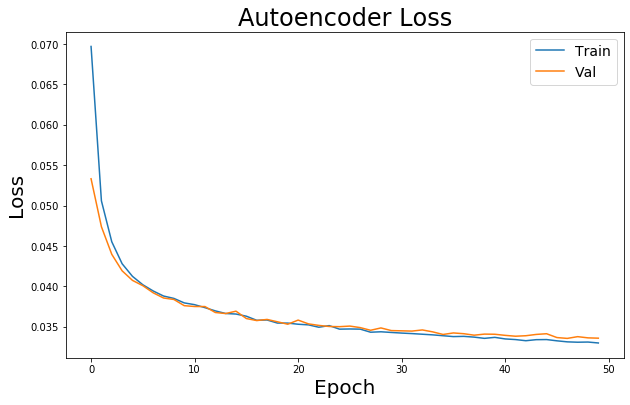

In [22]:
# your code here
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(history_ae.history['loss'], label='Train')
ax.plot(history_ae.history['val_loss'], label='Val')
ax.set_xlabel("Epoch", fontsize=20)
ax.set_ylabel("Loss", fontsize=20)
ax.legend(fontsize=14)
ax.set_title('Autoencoder Loss', fontsize=24)

plt.show()

**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?


In [23]:
# your code here
ae_latent_train = encoder.predict(x_train)

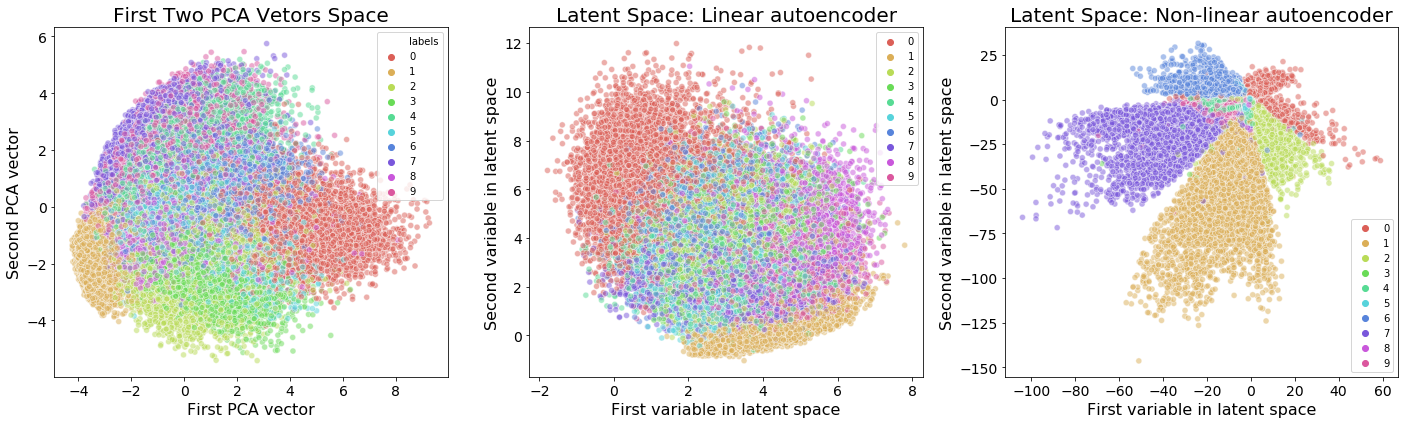

In [24]:
# your code here
fig, ax = plt.subplots(1, 3, figsize=(20,6))

current_palette = sns.color_palette("hls", 10)

sns.scatterplot(x='PCA vector 1',
                y='PCA vector 2',
                hue='labels',
                palette=current_palette,
                alpha=0.5,
                data=df_pca_latent_train, ax=ax[0])

sns.scatterplot(x=lae_latent_train[:,0],
                y=lae_latent_train[:,1],
                hue=y_train,
                palette=current_palette,
                alpha=0.5, ax=ax[1])

sns.scatterplot(x=ae_latent_train[:,0],
                y=ae_latent_train[:,1],
                hue=y_train,
                palette=current_palette,
                alpha=0.5, ax=ax[2])

ax[0].set_title('First Two PCA Vetors Space', fontsize=20)
ax[0].set_xlabel('First PCA vector', fontsize=16)
ax[0].set_ylabel('Second PCA vector', fontsize=16)
ax[0].tick_params(labelsize=14)

ax[1].set_title('Latent Space: Linear autoencoder', fontsize=20)
ax[1].set_xlabel('First variable in latent space', fontsize=16)
ax[1].set_ylabel('Second variable in latent space', fontsize=16)
ax[1].tick_params(labelsize=14)

ax[2].set_title('Latent Space: Non-linear autoencoder', fontsize=20)
ax[2].set_xlabel('First variable in latent space', fontsize=16)
ax[2].set_ylabel('Second variable in latent space', fontsize=16)
ax[2].tick_params(labelsize=14)

plt.tight_layout()

*Your answer here*<br>
The non-linear autoencoder has substantially better discrimination ability in 2D space, compared to the PCA and the linear autoencoder. Most of the digits are well separated in the 2D latent space in non-linear autoencoder.

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'.


In [25]:
# your code here
x_test_PCA = pca_transformer.transform(x_test.reshape(len(x_test), -1))
pca_recons_x_test = pca_transformer.inverse_transform(x_test_PCA).reshape(-1, 28, 28)

lae_recons_x_test_center = lae.predict(x_test_center)
lae_recons_x_test = lae_recons_x_test_center + np.mean(x_test)

ae_recons_x_test = ae.predict(x_test)

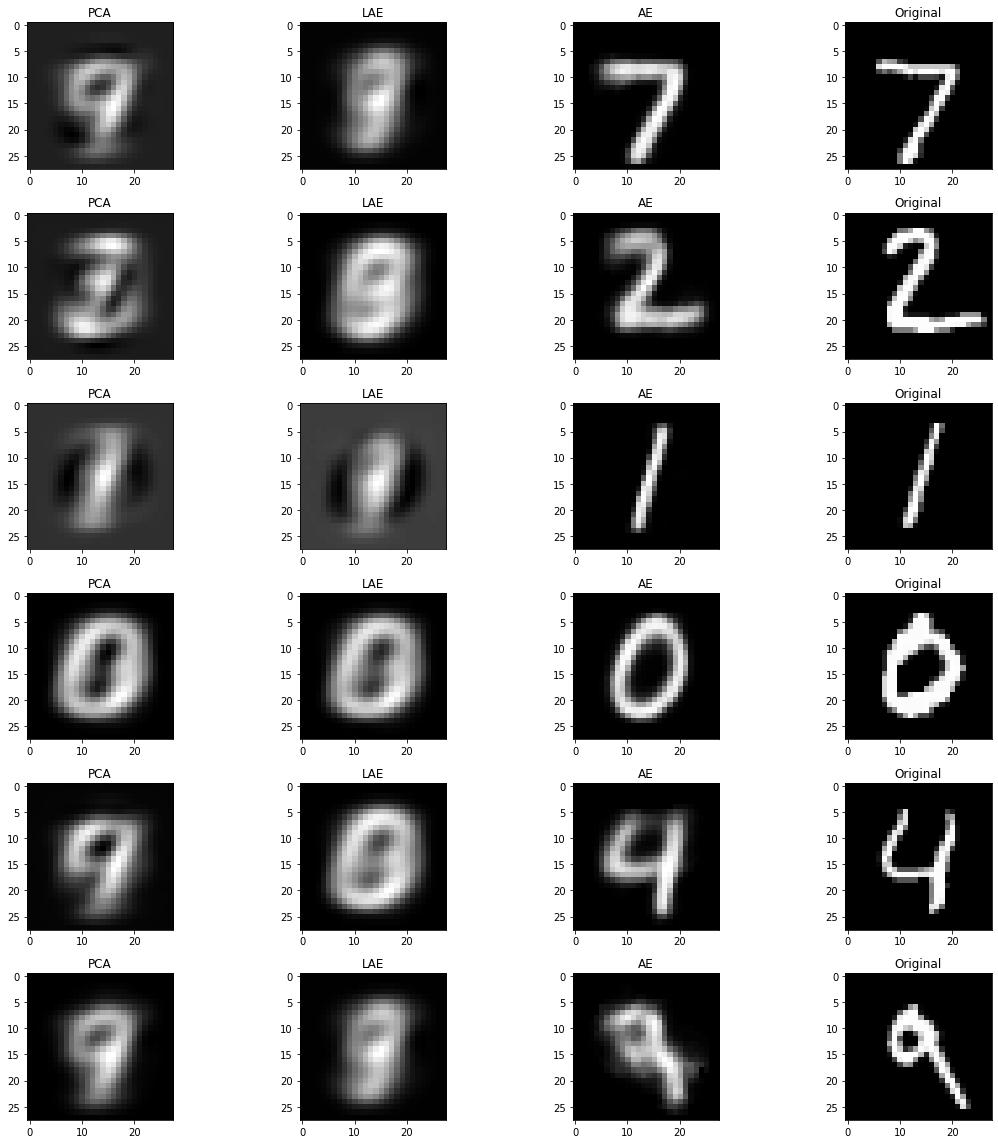

In [26]:
# your code here
f, ax = plt.subplots(6, 4, figsize=(16,16))

for i in range(5):
    ax[i][0].imshow(pca_recons_x_test[i], cmap='gray')
    ax[i][0].set_title('PCA', fontsize=12)
    ax[i][1].imshow(lae_recons_x_test[i], cmap='gray')
    ax[i][1].set_title('LAE', fontsize=12)
    ax[i][2].imshow(ae_recons_x_test[i], cmap='gray')
    ax[i][2].set_title('AE', fontsize=12)
    ax[i][3].imshow(x_test[i], cmap='gray')
    ax[i][3].set_title('Original', fontsize=12)
    
ax[5][0].imshow(pca_recons_x_test[7], cmap='gray')
ax[5][0].set_title('PCA', fontsize=12)
ax[5][1].imshow(lae_recons_x_test[7], cmap='gray')
ax[5][1].set_title('LAE', fontsize=12)
ax[5][2].imshow(ae_recons_x_test[7], cmap='gray')
ax[5][2].set_title('AE', fontsize=12)
ax[5][3].imshow(x_test[7], cmap='gray')
ax[5][3].set_title('Original', fontsize=12)
    
plt.tight_layout()

**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?


In [27]:
# your code here
pca_mse = mean_squared_error(x_test.reshape(len(x_test), -1), pca_recons_x_test.reshape(len(x_test), -1))
lae_mse = mean_squared_error(x_test.reshape(len(x_test), -1), lae_recons_x_test.reshape(len(x_test), -1))
ae_mse = mean_squared_error(x_test.reshape(len(x_test), -1), ae_recons_x_test.reshape(len(x_test), -1))
print('The average reconstruction error for PCA is {:.4f}'.format(pca_mse))
print('The average reconstruction error for LAE is {:.4f}'.format(lae_mse))
print('The average reconstruction error for AE is {:.4f}'.format(ae_mse))

The average reconstruction error for PCA is 0.0557
The average reconstruction error for LAE is 0.0586
The average reconstruction error for AE is 0.0336


*Your answer here*<br>
Yes. The average reconstruction error for AE is substantially better than that for PCA and LAE. Moreover, PCA has slightly lower error than the LAE. These results are compatible with the conclusion in Q 1.8.

<div class='exercise'><b> Question 2: Convolutional Autoencoders and Outlier Detection [50pts total] </b></div>

For this question, we will be using a modified version of a subset of MNIST. We have hidden some images of handwritten letters in the dataset `data/cs109b-mnist-mix.csv` amongst thousands of handwritten digits. The dataset is provided as a csv, where each row is an image, and each column gives the value of a given pixel in a flattened 28 by 28 image. It would be very tedious to have humans flip through every image to find the letters, so instead we will exploit a neat feature of autoencoders, outlier detection. This method turns a disadvantage of autoencoders, namely, their inability to properly reconstruct data very dissimilar to what they were trained on, into an advantage. 

You will also be constructing a convolutional autoencoder, which tends to work a lot better for reconstructing images, all while using substantially fewer parameters.

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.

**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.

**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.


## Answers

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.


In [28]:
# your code here
images_2 = pd.read_csv('cs109b-mnist-mix.csv')
x_cs109b = np.array(images_2.astype('float32')/255).reshape(-1, 28, 28)

In [29]:
len(x_cs109b)

3066

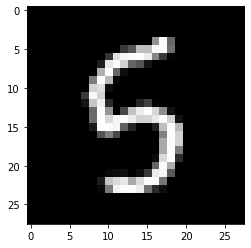

In [30]:
# your code here
plt.imshow(x_cs109b[0], cmap='gray')
plt.show()

**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.


In [31]:
from tensorflow.keras.layers import Conv2DTranspose

In [32]:
# your code here
input_shape = (28, 28, 1)
n_filters = 64

input_cae = Input(shape=input_shape, name='Input_cae')
Conv_1 = Conv2D(n_filters, kernel_size=3, strides=(2, 2), padding="SAME",
                activation='relu', name='encode_Conv_1')(input_cae)
Conv_2 = Conv2D(n_filters*2, kernel_size=3, strides=(2, 2), padding="SAME",
                activation='relu', name='encode_Conv_2')(Conv_1)
flatten = Flatten(name='Flatten')(Conv_2)
encode_dense_1 = Dense(n_filters, activation='relu', name='encode_dense')(flatten)
latent_view = Dense(8, activation='relu', name='latent_view')(encode_dense_1)
decode_dense_1 = Dense(n_filters, activation='relu', name='decode_dense_1')(latent_view)
decode_dense_2 = Dense(7*7*n_filters*2, activation='relu', name='decode_dense_2')(decode_dense_1)
reshape = Reshape(target_shape=(7, 7, n_filters*2), name='Reshape')(decode_dense_2)
Conv_Trans_1 = Conv2DTranspose(n_filters, kernel_size=3, strides=(2, 2), padding="SAME",
                               activation='relu', name='Conv_Trans_1')(reshape)
output = Conv2DTranspose(filters=1, kernel_size=3, strides=(2, 2), padding="SAME",
                        activation='sigmoid', name='Output')(Conv_Trans_1)

cae = Model(input_cae, output, name='cae')
cae.compile(loss='mse', optimizer=Adam(lr=0.001))
cae.summary()

Model: "cae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_cae (InputLayer)       [(None, 28, 28, 1)]       0         
_________________________________________________________________
encode_Conv_1 (Conv2D)       (None, 14, 14, 64)        640       
_________________________________________________________________
encode_Conv_2 (Conv2D)       (None, 7, 7, 128)         73856     
_________________________________________________________________
Flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
encode_dense (Dense)         (None, 64)                401472    
_________________________________________________________________
latent_view (Dense)          (None, 8)                 520       
_________________________________________________________________
decode_dense_1 (Dense)       (None, 64)                576     

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.


In [33]:
x_train_2 = x_train.reshape(-1, 28, 28, 1)
x_test_2 = x_test.reshape(-1, 28, 28, 1)

x_train_2.shape, x_test_2.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## Note
I didn't re-run the cell below and used weights saved.

In [21]:
# your code here
StartTime = datetime.now()

batch_size = 128
epochs = 100

callbacks = [ tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss',
                    patience=10,
                    verbose=5, mode='auto')
             ]

history_cae = cae.fit(x_train_2, x_train_2, epochs=epochs, batch_size=batch_size,
                      validation_data=(x_test_2, x_test_2), callbacks=callbacks)

print(datetime.now() - StartTime)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0515 - val_loss: 0.0309
Epoch 2/100
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0289 - val_loss: 0.0270
Epoch 3/100
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0263 - val_loss: 0.0253
Epoch 4/100
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0244 - val_loss: 0.0229
Epoch 5/100
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0218 - val_loss: 0.0210
Epoch 6/100
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0204 - val_loss: 0.0195
Epoch 7/100
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0185 - val_loss: 0.0178
Epoch 8/100
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0173 - val_loss: 0.0169
Epoch 9/100
60000/60000 [==============================] - 7s 118us/sample - l

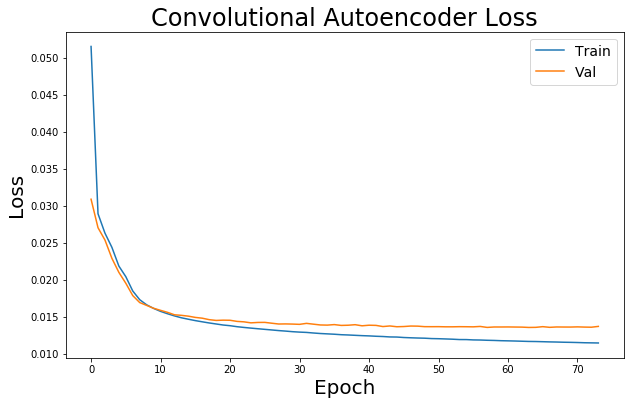

In [22]:
# your code here
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(history_cae.history['loss'], label='Train')
ax.plot(history_cae.history['val_loss'], label='Val')
ax.set_xlabel("Epoch", fontsize=20)
ax.set_ylabel("Loss", fontsize=20)
ax.legend(fontsize=14)
ax.set_title('Convolutional Autoencoder Loss', fontsize=24)

plt.show()

In [23]:
cae.save_weights('weights_cae')

In [34]:
input_shape = (28, 28, 1)
n_filters = 64

def create_cae(input_shape, n_filters):

    input_cae = Input(shape=input_shape, name='Input_cae')
    Conv_1 = Conv2D(n_filters, kernel_size=3, strides=(2, 2), padding="SAME",
                    activation='relu', name='encode_Conv_1')(input_cae)
    Conv_2 = Conv2D(n_filters*2, kernel_size=3, strides=(2, 2), padding="SAME",
                    activation='relu', name='encode_Conv_2')(Conv_1)
    flatten = Flatten(name='Flatten')(Conv_2)
    encode_dense_1 = Dense(n_filters, activation='relu', name='encode_dense')(flatten)
    latent_view = Dense(8, activation='relu', name='latent_view')(encode_dense_1)
    decode_dense_1 = Dense(n_filters, activation='relu', name='decode_dense_1')(latent_view)
    decode_dense_2 = Dense(7*7*n_filters*2, activation='relu', name='decode_dense_2')(decode_dense_1)
    reshape = Reshape(target_shape=(7, 7, n_filters*2), name='Reshape')(decode_dense_2)
    Conv_Trans_1 = Conv2DTranspose(n_filters, kernel_size=3, strides=(2, 2), padding="SAME",
                                   activation='relu', name='Conv_Trans_1')(reshape)
    output = Conv2DTranspose(filters=1, kernel_size=3, strides=(2, 2), padding="SAME",
                            activation='sigmoid', name='Output')(Conv_Trans_1)

    cae = Model(input_cae, output, name='cae')
    cae.compile(loss='mse', optimizer=Adam(lr=0.001))
    
    return cae

cae_loaded = create_cae(input_shape, n_filters)
cae_loaded.load_weights('weights_cae')

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?


In [35]:
# your code here
cae_recons_x_test = cae_loaded.predict(x_test.reshape(-1, 28, 28, 1)).reshape(-1, 28, 28)

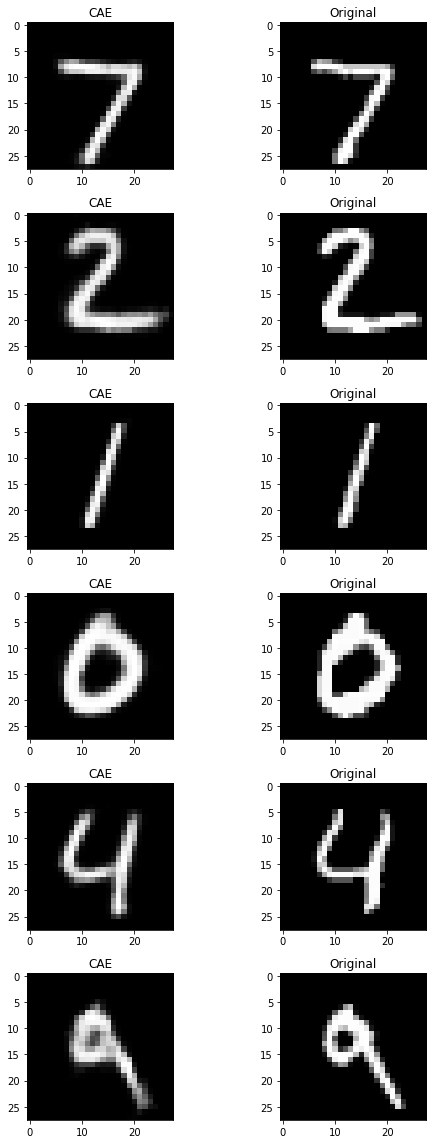

In [36]:
# your code here
f, ax = plt.subplots(6, 2, figsize=(8,16))

for i in range(5):
    ax[i][0].imshow(cae_recons_x_test[i], cmap='gray')
    ax[i][0].set_title('CAE', fontsize=12)
    ax[i][1].imshow(x_test[i], cmap='gray')
    ax[i][1].set_title('Original', fontsize=12)
    
ax[5][0].imshow(cae_recons_x_test[7], cmap='gray')
ax[5][0].set_title('CAE', fontsize=12)
ax[5][1].imshow(x_test[7], cmap='gray')
ax[5][1].set_title('Original', fontsize=12)
    
plt.tight_layout()

*Your answer here*<br>
From the visual perspective, the reconstruction ability of the convolutional autoencoder is substantially better than that of the dense autoencoder. Especially, the digit '4' is well reconstructed in the convolutional autoencoder model.

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.


In [37]:
# your code here
mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
x_test_flatten = x_test.reshape(len(x_test), -1)
cae_recons_x_test_flatten = cae_recons_x_test.reshape(len(cae_recons_x_test), -1)

mse_x_test = mse(x_test_flatten, cae_recons_x_test_flatten)
mse_x_test

<tf.Tensor: id=69408, shape=(10000,), dtype=float32, numpy=
array([0.00329756, 0.01323272, 0.00127669, ..., 0.00711685, 0.01472587,
       0.01498451], dtype=float32)>

In [38]:
# your code here
cae_recons_x_cs109b = cae_loaded.predict(x_cs109b.reshape(-1, 28, 28, 1))
x_cs109b_flatten = x_cs109b.reshape(len(x_cs109b), -1)
cae_recons_x_cs109b_flatten = cae_recons_x_cs109b.reshape(len(cae_recons_x_cs109b), -1)

mse_x_cs109b = mse(x_cs109b_flatten, cae_recons_x_cs109b_flatten)
mse_x_cs109b

<tf.Tensor: id=69572, shape=(3066,), dtype=float32, numpy=
array([0.01033382, 0.02209889, 0.02789053, ..., 0.01852322, 0.01111164,
       0.00790286], dtype=float32)>

**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.


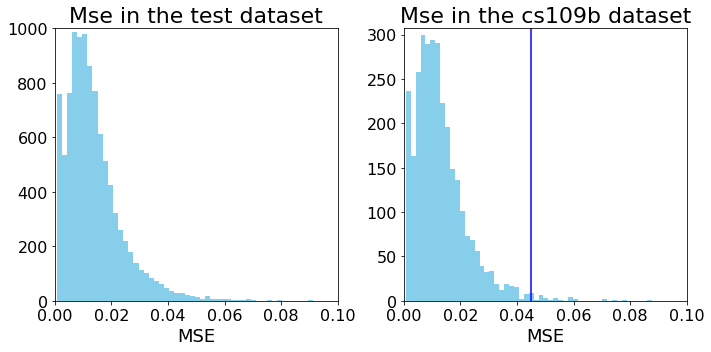

In [39]:
# your code here
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(mse_x_test, bins=50, color='skyblue')
ax[0].set_xlim(0, 0.1)
ax[0].set_ylim(0, 1000)
ax[0].set_xlabel('MSE', fontsize=18)
ax[0].set_title('Mse in the test dataset', fontsize=22)
ax[0].tick_params(axis='both', labelsize=16)

ax[1].hist(mse_x_cs109b, bins=50, color='skyblue')
ax[1].set_xlim(0, 0.1)
ax[1].set_ylim(0, 307)
ax[1].set_xlabel('MSE', fontsize=18)
ax[1].set_title('Mse in the cs109b dataset', fontsize=22)
ax[1].tick_params(axis='both', labelsize=16)
ax[1].axvline(0.045, c='blue', label='Threshold')

plt.tight_layout()

In [40]:
# your code here
x_cs109b_thr = np.sum(mse_x_cs109b>0.045)
print('In the cs109b dataset, {} ({:.2f}%) images have MSE >0.045 after reconstruction.'.format(x_cs109b_thr, x_cs109b_thr/len(x_cs109b)*100))

In the cs109b dataset, 33 (1.08%) images have MSE >0.045 after reconstruction.


*Your answer here*<br>
Based on the histograms above, most images in the two datasets seem to be collected from the same distribution. From the visual perspective, we can say that the images with MSE more than 0.045 are potential outliers. In fact, only 33 (1.08%) of the images have MSE more than 0.045 in the cs109b dataset. This number seems to be reasonable to investigate manually.

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.

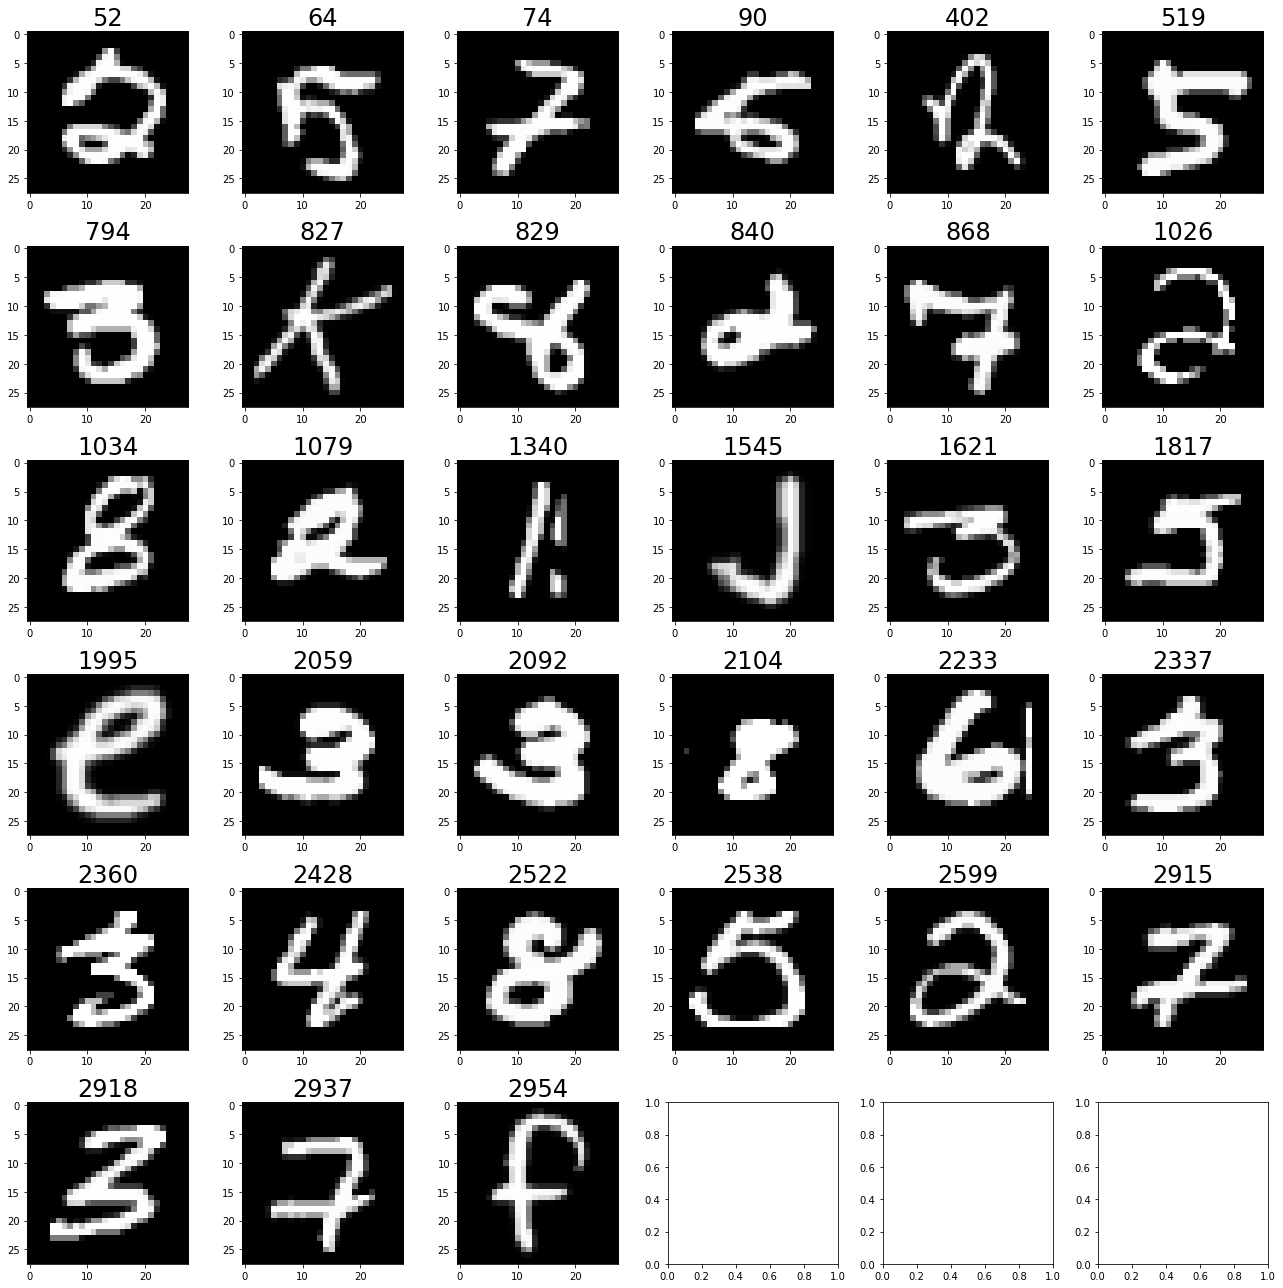

In [41]:
# your code here
fig, ax = plt.subplots(6, 6, figsize=(18, 18))

for i, index in enumerate(np.argwhere(mse_x_cs109b>0.045)):
    ax[i//6][i%6].imshow(x_cs109b[index[0]], cmap='gray')
    ax[i//6][i%6].set_title(f'{index[0]}', fontsize=24)

plt.tight_layout()

In [42]:
table = pd.DataFrame({'letter': ['k', 'k', 'j', 'e', 'f'],
                      'index': [827, 1340, 1545, 1995, 2954]})
table

,letter,index
0,k,827
1,k,1340
2,j,1545
3,e,1995
4,f,2954


*Your answer here*<br>
I showed the answer using pandas dataframe above.